## Esercitazione 8  del    23 Aprile 2024


In [ ]:
import numpy as np
import numpy.linalg as npl
import scipy as sp
import scipy.linalg as spl
import matplotlib.pyplot as plt

## Condizionamento del problema della soluzione di un sistema lineare

# Esercizio 1
- Costruire la matrice di Vandermonde A, generata dal vettore x=[1.0,2.0,...,6.0] utilizzando la funzione np.vander(x, increasing=True) di numpy. 
- Calcolarne l'indice di condizionamento in norma infinito senza utilizzare la funzione cond di numpy.linalg e poi confrontarne il valore con quello ottenuto utilizzando la funzione.
- Considerare il sistema lineare Ax=b  con matrice dei coefficienti A e termine noto costruito in maniera tale che la soluzione esatta sia il vettore x=[1,1,1,1,1,1] (ogni sua componente è 1) e risolverlo usando il metodo solve del modulo linalg di Scipy.
- perturbare il vettore dei termini noti della quantità
- 
$$
\delta b = 0.025 \, \ast \,
\left [
\begin{array}{c}
1\\
0\\
0\\
0
\end{array}
\right ]
$$
- Risolvere il sistema con termine noto pertubato $b + \delta b$ ((usando il metodo solve del modulo linalg di Scipy).
- Calcolare l'errore relativo sul termine noto e l'errore relativo sulla soluzione. Cosa si può concludere?

N.B. per il calcolo dell'inversa della matrice di A usare la funzione di numpy.linalg.inv(A).


In [ ]:
def norminf(A):
    return np.max(np.sum(np.abs(A), axis=1))

In [ ]:
x = np.arange(1, 7)
A = np.vander(x, increasing=True)
cond = norminf(A) * norminf(npl.inv(A))
print(cond, npl.cond(A, p=np.inf))

In [ ]:
b = np.sum(A, axis=1).reshape(6, 1)
x = spl.solve(A, b)
print(x)

In [ ]:
db = np.zeros(b.shape)
db[0] = 0.025

pb = b + db
px = spl.solve(A, pb)
print(x)
print(px)

In [ ]:
errrel_dati = npl.norm(pb - b, np.inf) / npl.norm(b, np.inf)
print("Errore relativo dati: ", errrel_dati)

errrel_sol = npl.norm(px - x, np.inf) / npl.norm(x, np.inf)
print("Errore relativo soluzione: ", errrel_sol)

# Il problema è mal condizionato, l'indice di condizionamento rappresenta
# un fattore di amplificazione sulla soluzione di piccoli errori sui dati

## Esercizio 2
Assegnato il sistema lineare $Ax = b$, con
$$
A =
\left [
\begin{array}{ccc}
6 & 63 & 662.2\\
63 & 662.2 & 6967.8\\
662.2 & 6967.8 & 73393.5664
\end{array}
\right ], \qquad
b =
\left [
\begin{array}{c}
1.1\\
2.33\\
1.7
\end{array}
\right ]
$$
- trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
- perturbare la matrice dei coefficienti della quantità
$$
\delta A =
0.01 \, \ast \,
\left [ \begin{array}{ccc}
1 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 0
\end{array}
\right ]
$$
quindi calcolare l'errore relativo sulla soluzione e confrontarlo con la
perturbazione relativa sui dati di ingresso. Cosa si osserva?

## Esercizio 3
 
Assegnato il sistema lineare $Ax = b$, con $A$ matrice di Hilbert di ordine
$4$ e $b = [1, 1, 1, 1]^T$,
 - trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
 -  perturbare il vettore dei termini noti della quantità
$$
\delta b = 0.01 \, \ast \,
\left [
\begin{array}{c}
1\\
-1\\
1\\
-1
\end{array}
\right ]
$$
quindi calcolare la soluzione del sistema $A x_p= b_p$ con termine noto $b_p=b+ \delta b$.
Calcolare l'errore relativo sulla soluzione e confrontarlo con la perturbazione relativa sui dati di ingresso. Cosa si osserva?

Nota: per la costruzione della matrice di Hilbert usare la funzione hilbert(n) del modulo scipy.linalg
(scipy.linalg.hilbert(n))  dove bisogna specificare l'ordine n della matrice.

## Metodi diretti per la soluzione numerica di un sistema lineare

## Nota 1.
La funzione *scipy.linalg.lu(A)*  , presa in input una matrice A a rango massimo, restituisce in output le matrici $P^T$,L,U,  della fattorizzazione di LU della matrice A in maniera tale che PA=LU (restituisce la matrice di permutazione trasposta)

In [ ]:
import numpy as np
import scipy as sp
from scipy.linalg import lu
A=np.array([[2,1],[3,4]])
PT,L,U=lu(A)  #Restituisce in output la trasposta della matrice di Permutazione
P=PT.T.copy()   #P è la matrice di permutazione
print("A=",A)
print("L=",L)
print("U=",U)
print("P=",P)
#LU è la fattorizzazione di P*A (terorema 2)
A1=P@A # equivale al prodotto matrice x matrice np.dot(P,A)
A1Fatt=L@U # equivale a np.dot(L,U)
print("Matrice P*A \n", A1)
print("Matrice ottenuta moltipicando Le ed U \n",A1Fatt)


## Nota 2
La funzione *scipy.linalg.cholesky(a, lower=True)*, presa in input una matrice simmetrica e definta positiva restituisce in output la matrice L triangolare inferiore tale che $A=L \cdot L^T$. Se la matrice in input non è definita positiva, restituisce un errore.

In [ ]:
from scipy.linalg import cholesky
A=np.array([[2,1,3],[1,5,7],[3,7,12]])
print(A)

In [ ]:
L=cholesky(A,lower=True)
print(L)
A1=L@L.T
print("A1=\n",A1)

## Nota 3
La funzione *scipy.linalg.qr(a)*, presa in input una matrice A (nxn)  a rango massimo, restituisce in output le matrici Q (ortogonale di dimensione nxn) ed una matrice R (nxn) triangolare superiore tale che $A=Q \cdot R$

In [ ]:
from scipy.linalg import qr
A=np.array([[2,1,3],[1,5,7],[3,7,12]])
Q,R=qr(A)
print("Q=",Q)
print("R=",R)
A1=Q@R
print(A1)

## Esercizio 4
- si implementi una function LUsolve(P,A,L,U,b) che risolve il sistema lineare Ax=b nel caso di fattorizzazione $PA = LU$ assegnata,
combinando i metodi di risoluzione in avanti ed all'indietro  implementati nel file SolveTriangular.py.
- si testi sulla matrice A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]]) con termine noto b scelto in maniera tale che la soluzione esatta del sistema lineare sia il vettore formato da tutti 1.

## Esercizio 5
Si implementi una function *solve_nsis(A,B)* per il calcolo della soluzione di un generale sistema lineare $AX = B$, con $X, B$ matrici, che usi la fattorizzazione LU della matrice PA, per risolvere n sistemi lineari: aventi la stessa matrice dei coefficienti A e termine noto l'i-esima colonna della matrice B. 
Utilizzarla poi per il calcolo dell'inversa delle
matrici non singolari
$$
A=\left[
\begin{array}{ccc}
3 & 5 & 7\\
2 & 3 & 4\\
5 & 9 & 11
\end{array}
\right ], \qquad
A=\left[
\begin{array}{cccc}
1 & 2 & 3 & 4\\
2 & -4 & 6 & 8\\
-1 & -2 & -3 & -1\\
5 & 7 & 0 & 1
\end{array}
\right ],
$$
confrontando i risultati ottenuti con l'output
della funzione  *scipy.linalg.inv(A)*

## Esercizio 6
Sfruttando la fattorizzazione PA=LU  di una delle matrici del punto precedente, calcolarne il determinante.


## Esercizio 7
Per valori di $n = 4 : 6 : 40$, si consideri il sistema lineare $A_n x = b$ con
$A_n$ matrice di Hankel di ordine $n$ di elementi
$$
a^{(n)}_{i,n+k-i}
=
\left \{
\begin{array}{ll}
2^k & \hbox{se} \ k > 0,\\
2^{1/(2-k)} & \hbox{se} \ k \leq 0,
\end{array}
\right .
\qquad
i = 1, ..., n, \ \  k = i + 1-n, ..., i,
$$
e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Si risolva tale sistema
con il metodo di fattorizzazione LU della matrice PA
e il metodo di fattorizzazione QR (Q,R  =scipy.linalg.qr(A)).
Calcolare gli errori relativi $\| \delta x \|_2/\|x\|_2$ da cui sono affette
le soluzioni calcolate con i due metodi e produrre, al variare di $n$, un
grafico in scala logaritmica ( matplotlib.plyplot.loglog) degli errori relativi calcolati. Che cosa si
osserva?

NB: per il calcolo della matrice di Hankel utilizzare la function 

def Hankel(n):

    A=np.zeros((n,n),dtype=float)
    for i in range(0,n):
        for k in range(i+1-n,i+1):
            if k>0:
                A[i,n-1+k-i]=2.0**(k+1)
            else:
                A[i,n-1+k-i]=2.0**(1/(2-k-1))
    return A

## Esercizio 8

Ripetere l'esercizio precedente per risolvere il sistema lineare $Ax = b$
con $A$ e $b$ cos\`i  definiti:
$$
a^{(n)}_{i,j}=
\left \{
\begin{array}{ll}
1 & \hbox{se} \ i=j \ \hbox{o \, se} \ j=n,\\
-1 & \hbox{se} \ i>j,\\
0 & \hbox{altrimenti}
\end{array}
\right .
\qquad
b = A \cdot [1, ..., 1]^T,
$$
per $n = 48 : 2 : 58$ e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Che
cosa si osserva?

## Metodi iterativi di Jacobi, Guass-Seidel e Gausseidel_SOR per la soluzione numerica di un sistema lineare

## Esercizio 9
Implementare la  funzione $jacobi(A,b,x0,toll,itmax)$ per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Jacobi. 
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [ ]:
def Jacobi(A, b, x0, toll, itmax):
    err = 1000
    d = np.diag(A)
    n = A.shape[0]
    invM = np.diag(1 / d)
    E = np.tril(A, -1)
    F = np.triu(A, 1)
    N = -(E + F)
    T = np.dot(invM, N)

    autoval = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(autoval))
    it = 0
    verr = []

    while it <= itmax and err >= toll:
        x = (b + np.dot(N, x0)) / d.reshape(n, 1)
        err = np.linalg.norm(x - x0) / np.linalg.norm(x)
        verr.append(err)
        x0 = x.copy()
        it += 1
    return x, it, verr, raggiospettrale

## Esercizio 10
Implementare la  funzione $gaussSeidel(A,b,x0,toll,it_max)$ per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Gauss-Seidel. 
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [ ]:
def LSolve(L, b):
    """
    Risoluzione con procedura forward di Lx=b con L triangolare inferiore
     Input: L matrice triangolare inferiore
            b termine noto
    Output: x: soluzione del sistema lineare
            flag=  0, se sono soddisfatti i test di applicabilità
                   1, se non sono soddisfatti
    """
    # test dimensione
    m, n = L.shape
    flag = 0
    if n != m:
        print("Errore: Matrice non quadrata")
        flag = 1
        x = []
        return x, flag

    # Test singolaritò
    if np.all(np.diag(L)) != True:
        print("el. diag. nullo - matrice triangolare inferiore")
        x = []
        flag = 1
        return x, flag

    # Preallocazione vettore soluzione
    x = np.zeros((n, 1))

    for i in range(n):
        s = np.dot(L[i, :i], x[:i])
        x[i] = (b[i] - s) / L[i, i]

    return x, flag

In [ ]:
def GaussSeidel(A, b, x0, toll, itmax):
    err = 1000
    d = np.diag(A)

    D = np.diag(d)
    E = np.tril(A, -1)
    F = np.triu(A, 1)

    M = E + D
    N = -F
    T = np.dot(npl.inv(M), N)

    autoval = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(autoval))

    it = 0
    verr = []

    while it <= itmax and err >= toll:
        tmp = b - F@x0
        x, _ = LSolve(M, tmp)
        err = np.linalg.norm(x - x0) / np.linalg.norm(x)
        verr.append(err)
        x0 = x.copy()
        it += 1

    return x, it, verr, raggiospettrale

## Esercizio 11
Testare i metodi di Jacobi e di Gauss Seidel nella soluzione dei sistemi lineare Ax=b, dove 
- A=np.array([[4,1,3],[3,4,1],[1,1,17]]) 
- A=np.array([[3,0, 4],[7, 4, 3],[-1, -1 ,-2]])
- A=np.array([[5, 0, -1, 2],[ -2, 4, 1, 0],[0, -1, 4, -1],[ 2, 0, 0, 3]])

ed il termine noto del sistema è scelto in maniera tale che la soluzione esatta del sistema sia il vettore fatto da tutti 1.
Visualizzare in un grafico in scala logaritmica  l'errore per ogni iterazione per ciascun metodo. Cosa si osserva?
Porre toll=1e-8 it_max=500 e x0=np.zeros(A.shape[0]

In [ ]:
toll = 1e-8
itmax = 100

In [ ]:
A=np.array([[4,1,3],[3,4,1],[1,1,17]]) 
n = A.shape[0]
b = np.sum(A, axis=1).reshape(n, 1)
x0 = np.zeros(n).reshape(n, 1)

xj, itj, errj, rj = Jacobi(A, b, x0, toll, itmax)
xg, itg, errg, rg = GaussSeidel(A, b, x0, toll, itmax)
print("Raggio Spettrale Jacobi: ", rj)
print("Raggio Spettrale Gauss-Seidel: ", rg)

plt.semilogy(np.arange(itj), errj)
plt.semilogy(np.arange(itg), errg)
plt.legend(["Jacobi", "Gauss-Seidel"])
plt.show()

# Il raggio spettrale minore fa convergere più velocemente il metodo

In [ ]:
A=np.array([[3,0, 4],[7, 4, 3],[-1, -1 ,-2]])
n = A.shape[0]
b = np.sum(A, axis=1).reshape(A.shape[0], 1)
x0 = np.zeros(A.shape[0]).reshape(n, 1)

xj, itj, errj, rj = Jacobi(A, b, x0, toll, itmax)
xg, itg, errg, rg = GaussSeidel(A, b, x0, toll, itmax)
print("Raggio Spettrale Jacobi: ", rj)
print("Raggio Spettrale Gauss-Seidel: ", rg)

plt.semilogy(np.arange(itj), errj)
plt.semilogy(np.arange(itg), errg)
plt.legend(["Jacobi", "Gauss-Seidel"])
plt.show()

In [ ]:
A=np.array([[5, 0, -1, 2],[ -2, 4, 1, 0],[0, -1, 4, -1],[ 2, 0, 0, 3]])
n = A.shape[0]
b = np.sum(A, axis=1).reshape(n, 1)
x0 = np.zeros(n).reshape(n, 1)

xj, itj, errj, rj = Jacobi(A, b, x0, toll, itmax)
xg, itg, errg, rg = GaussSeidel(A, b, x0, toll, itmax)
print("Raggio Spettrale Jacobi: ", rj)
print("Raggio Spettrale Gauss-Seidel: ", rg)

plt.semilogy(np.arange(itj), errj)
plt.semilogy(np.arange(itg), errg)
plt.legend(["Jacobi", "Gauss-Seidel"])
plt.show()

## Esercizio 12
Implementare la  funzione $gaussSeidelSor(A,b,x0,omega, toll,itmax)$ per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Gauss-Seidel-SOR
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- omega: il parametro di rilassamento
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

Restituisce in output
- la soluzione x
- l'errore ad ogni iterazione calcolato come $||x^{(k)}-x^{(k-1)}||/||x^{(k)}||$

Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [95]:
def GaussSeidelSor(A, b, x0, toll, itmax, omega):
    err = 1000
    d = np.diag(A)
    D = np.diag(d)
    Dinv = np.diag(1 / d)
    E = np.tril(A, -1)
    F = np.triu(A, 1)

    Momega = D + omega * E
    Nomega = (1 - omega) * D - omega * F
    T = np.dot(npl.inv(Momega), Nomega)

    autoval = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(autoval))

    M = D + E
    N = -F
    it = 0
    xold = x0.copy()
    xnew = x0.copy()
    verr = []

    while it <= itmax and err >= toll:
        tmp = b - F @ xold
        xtilde, flag = LSolve(M, tmp)
        xnew = (1 - omega) * xold + omega * xtilde

        err = np.linalg.norm(xnew - xold) / np.linalg.norm(xnew)
        verr.append(err)
        xold = xnew.copy()
        it += 1

    return xnew, it, verr, raggiospettrale

## Esercizio 13
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$
- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson di ordine 10 e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo di Jacobi, Gauss-Seidel e Gauss-Seidel-Sor con parametro omega scelto tra 1 e 2 in maniera tale che il raggio spettrale della matrice di iterazione sia il più piccolo possibile e confrontare su un unico grafico l'andamento degli errori in scala logaritmica. Usare toll=1e-10.

In [84]:
def creaPoisson(n):
    # costruire una matrice di Poisson
    d = np.ones((n)) * 4
    e = -np.ones((n - 1,))
    f = -np.ones((n - 3,))
    A = np.diag(d) + np.diag(e, -1) + np.diag(e, 1) + np.diag(f, -3) + np.diag(f, 3)
    return A

Raggio Spettrale Jacobi:  0.8451732757464325
Raggio Spettrale Gauss-Seidel:  0.7185579379397852
Raggio Spettrale Gauss-Seidel-SOR:  0.44183538596589683


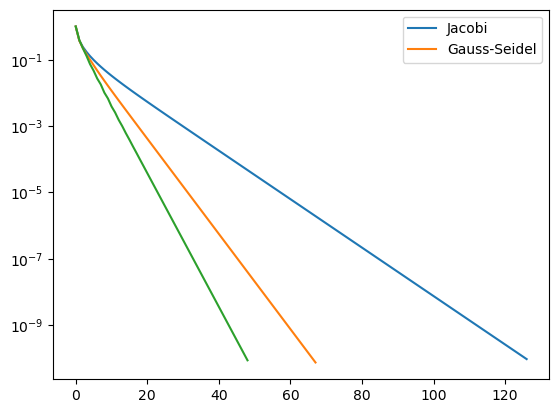

In [129]:
A = creaPoisson(10)
n = A.shape[0]
b = np.sum(A, axis=1).reshape(n, 1)
toll = 1e-10
itmax = 1000
x0 = np.zeros((n, 1))

xj, itj, errj, rj = Jacobi(A, b, x0, toll, itmax)
xg, itg, errg, rg = GaussSeidel(A, b, x0, toll, itmax)
omega = 1.319
xs, its, errs, rs = GaussSeidelSor(A, b, x0, toll, itmax, omega)
print("Raggio Spettrale Jacobi: ", rj)
print("Raggio Spettrale Gauss-Seidel: ", rg)
print("Raggio Spettrale Gauss-Seidel-SOR: ", rs)

plt.semilogy(np.arange(itj), errj)
plt.semilogy(np.arange(itg), errg)
plt.semilogy(np.arange(its), errs)
plt.legend(["Jacobi", "Gauss-Seidel"])
plt.show()